1. RA and Dec that is published is usually for the epoch of 2000, called J2000. Do you think the RA and Dec would change today? Use astropy to find the RA and Dec of a radio source – Cygnus - A (RA 19h59m28.3566s, Dec +40° 44′ 02.096″)

2. What will be this source's azimuth and elevation when observing from IIT Kanpur?

3. Show in a polar plot, how the azimuth and elevation of this source would change when observing at IITK.

4. Plot how Sun's RA and Dec changes over a year. Compare this with respect to that of Cygnus over a year?

In [2]:
!python -m pip install "astropy[dev_all]"

INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.8/176.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.7/235.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 370.4/370.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.0/98.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.5/253.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.3 MB/s eta 0:00:00


In [3]:
from astropy import units as u
from astropy.coordinates import SkyCoord,FK5,AltAz, EarthLocation, SkyCoord, get_body, get_sun
from astropy.time import Time
from astropy.visualization import quantity_support
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

Importing necessary packages

In [4]:
Cygnus_A_J2000 = SkyCoord('19h59m28.3566s', '40d44m02.096s', frame='fk5')
Cygnus_A_J2000

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (299.8681525, 40.73391556)>

Creating our object of interest.

In [9]:
time = Time("2025-01-19 11:00:00", scale = "utc")
time

<Time object: scale='utc' format='iso' value=2025-01-19 11:00:00.000>

In [10]:
Cygnus_A_today = Cygnus_A_J2000.transform_to(FK5(equinox=time))
Cygnus_A_today

<SkyCoord (FK5: equinox=2025-01-19 11:00:00.000): (ra, dec) in deg
    (300.08496398, 40.80359648)>

The RA and Dec indeed change with time. This is due to multiple effects, but can largely be attributed to precession and nutation of our own spinning top, the Earth.

The difference in the RA and declination of Cygnus A corresponding to J2000 and current time can be seen.

As for coding this out, I just used the internal method "transform_to"

In [13]:
Kanpur = EarthLocation(lat = 26.5123 * u.deg, lon = 80.2333 * u.deg)

I now intitialize the location of Kanpur in its coordinates so that we can determine its alt-az coordinates.

In [14]:
Cygnus_A_altaz = Cygnus_A_today.transform_to(AltAz(obstime = time, location = Kanpur))
print(f"Altitude = {Cygnus_A_altaz.alt}, Azimuth = {Cygnus_A_altaz.az}")

Altitude = 35.87141520882237 deg, Azimuth = 302.71161348054693 deg


I will now plot the horizontal coordinates of Cygnus A from Kanpur in a polar plot observed over 19th January. I will plot them for every minute.

It's also important to take into account the offset that we have between the local time (IST) and the UTC.

In [15]:
times_local_day = Time("2025-01-19 00:00:00", scale='utc') + np.arange(0, 24*60) * u.minute
offset = +5.5 * u.hour
times_utc_for_altaz = times_local_day - offset


I generated the time series/time vector for which I'm going to plot the trajectory. I now convert the coordinates into horizontal coordinates.

In [16]:
altaz_frame = AltAz(obstime=times_utc_for_altaz, location=Kanpur)
cygnus_a_altaz_coords = Cygnus_A_today.transform_to(altaz_frame)



Now, I'll convert the azimuth and elevations to different units so that it's convenient for my polar plot.

In [17]:
azimuths = cygnus_a_altaz_coords.az.to(u.rad)
elevations = cygnus_a_altaz_coords.alt.to(u.deg)


I'm not going to plot for negative altitudes because the object will be below the horizon so I'm going to filter out for those.

In [18]:
observable = elevations >= 0 * u.deg
azimuths_observable = azimuths[observable]
elevations_observable = elevations[observable]

Now I just define the size of my plot and its type. Then I define what I want to plot on the axes.
For generating the labels I used Gemini-3Pro.

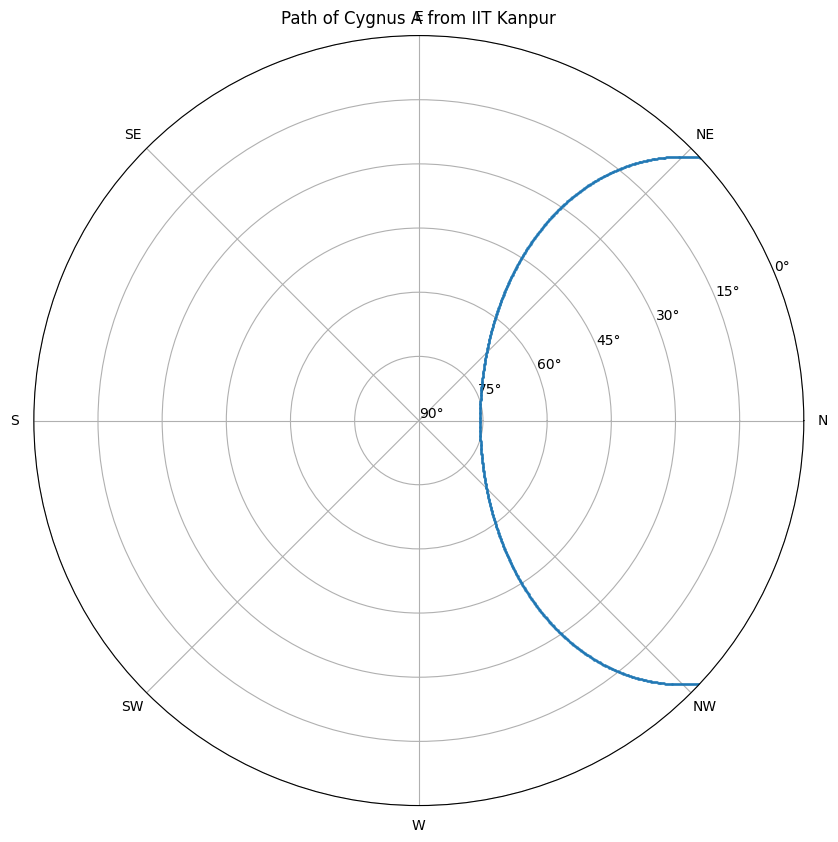

In [19]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='polar')

ax.plot(azimuths_observable, 90 - elevations_observable.value, '.', markersize=2, alpha=0.7)

ax.set_ylim(0, 90)
ax.set_yticks(np.arange(0, 91, 15))
ax.set_yticklabels([str(int(label)) + '°' for label in np.arange(90, -1, -15)])
ax.set_xticks(np.deg2rad([0, 45, 90, 135, 180, 225, 270, 315]))
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

ax.set_title('Path of Cygnus A from IIT Kanpur', va='bottom')
ax.grid(True)
plt.show()


Now, I will similarly generate the plot of the Sun's RA Dec and Cygnus A's RA Dec every day for the entire year of 2026.

In [41]:
times_year = Time("2025-01-01 00:00:00", scale='utc') + np.arange(366) * u.day

In [28]:
sun_coords = get_sun(times_year)
cygnus_a_coords = Cygnus_A_J2000.transform_to(FK5(equinox = times_year))

In [33]:
sun_ra = sun_coords.ra
sun_dec = sun_coords.dec
cygnus_a_ra = cygnus_a_coords.ra
cygnus_a_dec = cygnus_a_coords.dec

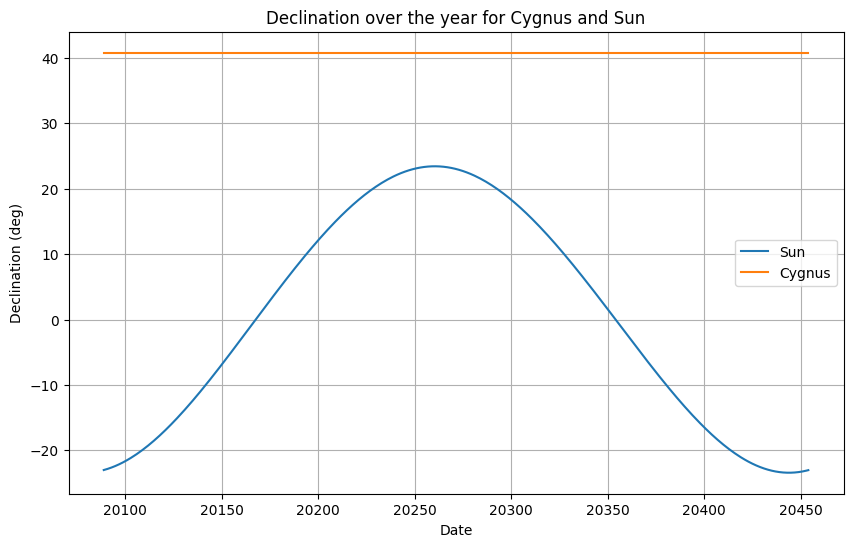

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(times_year.plot_date, sun_dec, label= "Sun")
plt.plot(times_year.plot_date, cygnus_a_dec, label = "Cygnus")

plt.xlabel("Date")
plt.ylabel("Declination (deg)")
plt.title(f"Declination over the year for Cygnus and Sun")
plt.grid(True)
plt.legend()

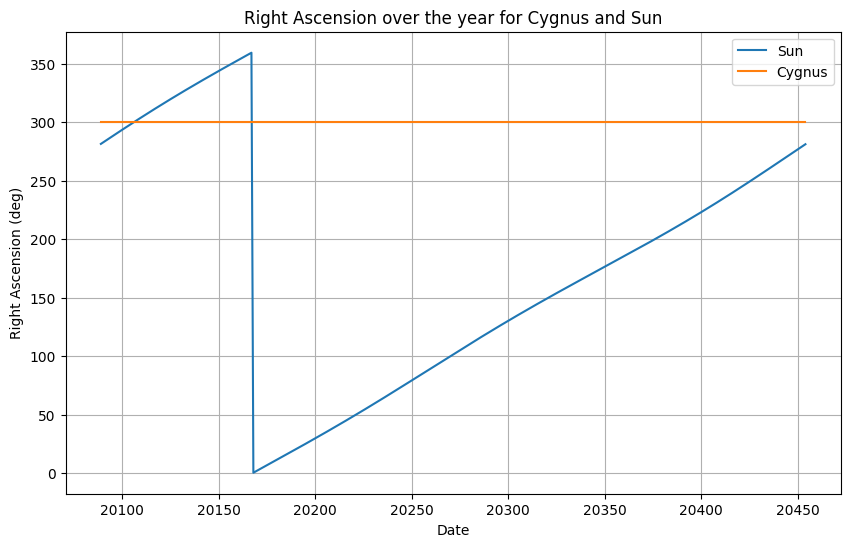

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(times_year.plot_date, sun_ra, label = "Sun")
plt.plot(times_year.plot_date, cygnus_a_ra, label = "Cygnus")

plt.xlabel("Date")
plt.ylabel("Right Ascension (deg)")
plt.title(f"Right Ascension over the year for Cygnus and Sun")
plt.grid(True)
plt.legend()

As I can see, the Declination of the Sun changes over the year sinusoidally, with maxima and minima at +- 23.42. The Right Ascension of the Sun grows linearly mod 360.

Now, for Cygnus A, its RA and Dec do not appreciably change when compared to the Sun.